# Unbalanced Classes

### Fraudulent Transactions

Let's consider the following scenario:  Prediction of fraudulent transactions.

- Fraudulent tranactions = Positive / Success
- Legitimate transactions = Negative / Fail

**Model Performance**

Correct Predictions
- Fraudulent: **50**
- Legitimate: **900**

Incorrect Predictions
- Fraudulent: **40**
- Legitimate: **10**

<img src="https://snag.gy/fxND5e.jpg" style="width: 500px;">

#### Oversampling/undersampling.

- **Oversampling** : you duplicate the observations of the minority class to obtain a more balanced dataset.

- **Undersampling** : you drop observations of the majority class to obtain a balanced dataset, see below.

In [1]:
# !pip install -U imbalanced-learn

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
    n_redundant=0, n_repeated=0, n_classes=3,
    n_clusters_per_class=1,
    weights=[0.01, 0.05, 0.94],
    class_sep=0.8, random_state=0)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 4674), (1, 4674), (2, 4674)]


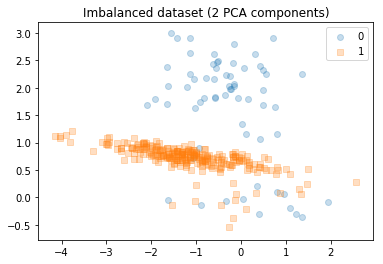

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m, alpha=1/4
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

Removed indexes: [  25   40   98  108  179  269  272  300  357  760  778  878  897  916
 1082 1131 1311 1358 1394 1444 1449 1499 1645 1675 1714 1746 1840 1862
 1952 2027 2461 2550 2563 2570 2661 2736 2968 2997 3066 3085 3122 3150
 3190 3330 3333 3370 3557 3598 3857 3915 3924 4032 4066 4144 4491 4536
 4546 4571 4578 4683 4763 4922 4930 4965 1090 1049  306 3038 3858 2170
 3864 3875 2941 4296 2300 2607 1684  743  461 2820 2252 4525 3256 3648
 2295 3931 4450 1492 4892  920  312  481  853 3669  816  846  806 3440
  142 4684 2597 4504 4069 2361 1828 1890 4062 1860 1128 1276 3459  543
  828 3988  568 2248 3630 3711 1257 2949 4946 4923 3064 3903 3710  667
 1894 1384  192 4426 1993 1880  958 3759 1594 1071 4103 1694  528 3463
 3608 4895 3737 2904 1269  989 2897 1639 2308 4662 4417 4695 4674 1140
 1345 1197 4647 2551   57  775 2530 4534  428 4518 2069 2113 4044 3096
 4220  266 1135 3486 2437  335 3004 3524  308 4397 4261 1381 3425 1569
   28 1575 2306 3219 3166 1625 1667 4362  821  702]


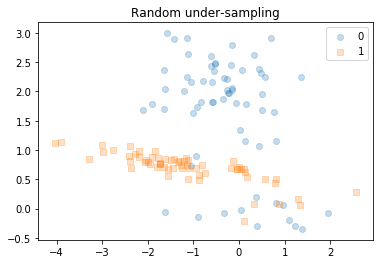

In [4]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

9022 new random picked points


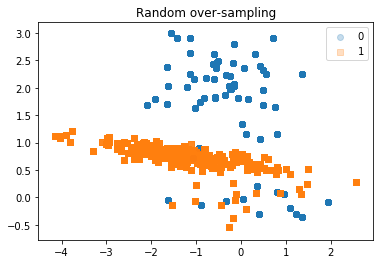

In [5]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

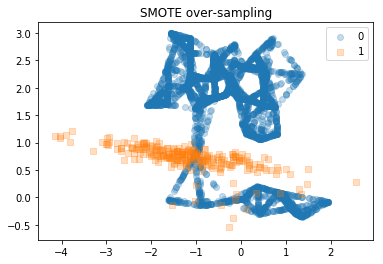

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

### Last pieces of advice for classification


#### Use one at a time
- Oversampling/undersampling.
- Weighting observations. (i.e. weighted least squares) ‣Stratified cross-validation.

#### Use what you are comfortable defending
- Changing threshold for classification.
- Purposefully optimizing evaluation metrics.

# Cheatsheet: Classification Metrics
#### Accuracy
$$
\frac{\text{# correct}}{\text{TP + FP + FN + TN}} = \frac{TP+TN}{1000} = \frac{950}{1000} = .95
$$

#### Misclassification (Error) Rate
$$
1 - \text{Accuracy} = 1- \frac{950}{1000} = .05
$$

#### Sensitivity
> P = Total Positive observations

$$
\frac{TP}{P} = \frac{50}{TP + FN} = \frac{50}{50 + 10} = .83
$$

#### Specificity 
> N = Total Negative observations

$$
\frac{TN}{N} = \frac{900}{TN + FP} = \frac{900}{900 + 40} = .96
$$